In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#important import 
import pandas as pd
import numpy as np
import os
import wrangle as w

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

In [3]:
#Acquire superstore data from codeup database
df = w.get_superstore_data()

In [4]:
df.head()

,Region ID,Category ID,Product ID,Customer ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Customer Name,Product Name,Category,Sub-Category,Region Name
0,1,1,FUR-BO-10001798,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Claire Gute,Bush Somerset Collection Bookcase,Furniture,Bookcases,South
1,1,2,FUR-CH-10000454,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,South
2,1,4,FUR-TA-10000577,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,South
3,1,5,OFF-ST-10000760,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Sean O'Donnell,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,South
4,1,11,OFF-PA-10002365,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Andrew Allen,Xerox 1967,Office Supplies,Paper,South


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Category ID    1734 non-null   int64  
 2   Product ID     1734 non-null   object 
 3   Customer ID    1734 non-null   object 
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Customer Name  1734 non-null   object 
 18  Product 

In [6]:
#Checking the nulls
df.isnull().sum().sum()

0

In [7]:
#Cleaning superstore data
df = w.prep_superstore(df, 'Order Date', 'Ship Date')

In [8]:
#Check to see if function rename the columns correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2014-01-04 to 2017-12-30
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     1734 non-null   object        
 1   customer_id    1734 non-null   object        
 2   order_id       1734 non-null   object        
 3   ship_date      1734 non-null   datetime64[ns]
 4   ship_mode      1734 non-null   object        
 5   segment        1734 non-null   object        
 6   country        1734 non-null   object        
 7   city           1734 non-null   object        
 8   state          1734 non-null   object        
 9   postal_code    1734 non-null   float64       
 10  sales          1734 non-null   float64       
 11  quantity       1734 non-null   float64       
 12  discount       1734 non-null   float64       
 13  profit         1734 non-null   float64       
 14  customer_name  1734 non-null   object        
 15  pro

In [9]:
#Let's take a look about the statistics of numeric values in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,1734.0,53501.926182,32180.245224,1841.0000,19143.0000,50315.00000,85705.00000,98661.000
sales,1734.0,229.206358,532.862614,1.0800,16.6950,52.24500,209.91750,8159.952
quantity,1734.0,3.794694,2.297407,1.0000,2.0000,3.00000,5.00000,14.000
discount,1734.0,0.160110,0.206419,0.0000,0.0000,0.20000,0.20000,0.800
profit,1734.0,21.880351,202.891949,-3839.9904,1.7024,8.07305,27.41445,3177.475
year,1734.0,2015.679931,1.086921,2014.0000,2015.0000,2016.00000,2017.00000,2017.000


In [10]:
#Let's see how many categories of products we have in the data.
df.category.unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [11]:
df.category.value_counts()

Office Supplies    1055
Furniture           360
Technology          319
Name: category, dtype: int64

In [12]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['category'] == 'Office Supplies']

In [13]:
#Get 4-year office supplies sales data.
office_supplies.index.min(), office_supplies.index.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [14]:
office_supplies.index

DatetimeIndex(['2014-01-04', '2014-01-04', '2014-01-04', '2014-01-09',
               '2014-01-10', '2014-01-13', '2014-01-13', '2014-01-13',
               '2014-01-13', '2014-01-16',
               ...
               '2017-12-26', '2017-12-28', '2017-12-28', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1055, freq=None)

In [16]:
#using the start of each month as the timestamp
monthly = office_supplies['sales'].resample('MS').mean()

In [17]:
monthly

Order Date
2014-01-01     74.457429
2014-02-01     33.662571
2014-03-01     67.455412
2014-04-01     66.099500
2014-05-01    375.750667
2014-06-01    140.007565
2014-07-01     79.522000
2014-08-01    110.157043
2014-09-01     69.604690
2014-10-01     81.188333
2014-11-01    147.313368
2014-12-01     98.343273
2015-01-01     20.976000
2015-02-01      5.280000
2015-03-01    591.895286
2015-04-01     81.791048
2015-05-01    147.551111
2015-06-01     41.702000
2015-07-01     99.810900
2015-08-01    179.547652
2015-09-01     99.560486
2015-10-01     54.009333
2015-11-01     98.947594
2015-12-01     96.551333
2016-01-01     20.664000
2016-02-01    169.427077
2016-03-01     92.878643
2016-04-01     88.174581
2016-05-01    103.841600
2016-06-01    106.722919
2016-07-01     87.023636
2016-08-01     66.192900
2016-09-01    233.697250
2016-10-01     91.151320
2016-11-01     39.701109
2016-12-01    145.662103
2017-01-01    132.975750
2017-02-01     92.604625
2017-03-01     98.022364
2017-04-01    

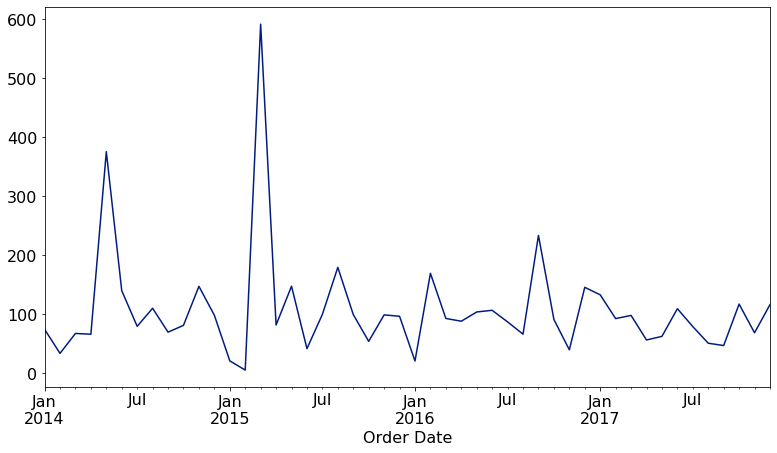

In [19]:
#Lets see monthly sales
monthly.plot()
plt.show()